In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load and Normalize the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Define the CNN model with the best configuration found in previous steps
def create_model(n_filters=64, dropout_rate=0.25, dense_size=512):
    model = Sequential([
        Conv2D(n_filters, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(n_filters, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Conv2D(n_filters * 2, (3, 3), padding='same', activation='relu'),
        Conv2D(n_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Flatten(),
        Dense(dense_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model

In [4]:
# Create the best model
best_model = create_model()

In [5]:
# Compile the model with the best learning rate found
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [6]:
# Train the model with the best batch size found
history = best_model.fit(
    x_train, y_train_one_hot,
    batch_size=128,  # The best batch size from your experiments
    epochs=15,  # The number of epochs from your experiments
    validation_data=(x_test, y_test_one_hot)
)

Epoch 1/15
391/391 [==============================] - 575s 1s/step - loss: 1.5143 - accuracy: 0.4455 - val_loss: 1.2097 - val_accuracy: 0.5621
Epoch 2/15
391/391 [==============================] - 551s 1s/step - loss: 1.0704 - accuracy: 0.6221 - val_loss: 0.8925 - val_accuracy: 0.6889
Epoch 3/15
391/391 [==============================] - 565s 1s/step - loss: 0.8689 - accuracy: 0.6947 - val_loss: 0.7802 - val_accuracy: 0.7276
Epoch 4/15
391/391 [==============================] - 564s 1s/step - loss: 0.7523 - accuracy: 0.7356 - val_loss: 0.7433 - val_accuracy: 0.7429
Epoch 5/15
391/391 [==============================] - 550s 1s/step - loss: 0.6560 - accuracy: 0.7695 - val_loss: 0.6812 - val_accuracy: 0.7634
Epoch 6/15
391/391 [==============================] - 550s 1s/step - loss: 0.6007 - accuracy: 0.7883 - val_loss: 0.6756 - val_accuracy: 0.7670
Epoch 7/15
391/391 [==============================] - 563s 1s/step - loss: 0.5301 - accuracy: 0.8139 - val_loss: 0.6356 - val_accuracy: 0.7826

In [7]:
# Define the class names for the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
# Select a random subset of 10 images from the CIFAR-10 test dataset
indices = np.random.choice(len(x_test), 10, replace=False)  # This gets 10 random indices
subset_x_test = x_test[indices]
subset_y_test = y_test[indices].flatten()  # Flatten y_test if it's not already a 1D array


In [9]:
# Make predictions on the subset of images
predictions = best_model.predict(subset_x_test)
predicted_classes = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 179ms/step


In [10]:
# Generate the confusion matrix
cm = confusion_matrix(subset_y_test, predicted_classes)

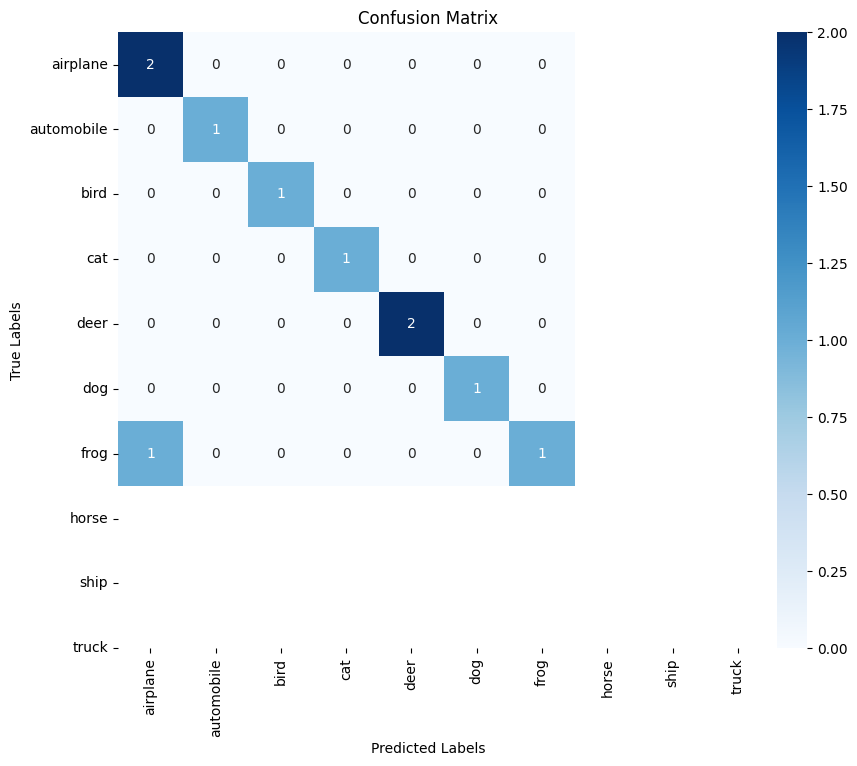

In [11]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()